In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.utils import get_week_range_df, to_week_range
from models.ar_model import plot_ar_results
from models.ar_model import ARHelper
from data.errors import get_errors_for_models

In [11]:
# Global set-up
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['axes.grid'] = True
sns.set_style("whitegrid")

In [12]:
df = get_week_range_df('week range')

In [13]:
train_interval = [to_week_range(2004, 1), to_week_range(2008, 52)]
validate_interval = [to_week_range(2004, 1), to_week_range(2011, 52)]
test_interval = [to_week_range(2012, 1), to_week_range(2016, 52)]

In [14]:
NUM_MODELS = 4
NUM_PERIODS_IN_SEASON = 52
GROUND_TRUTH_COLUMN = 'Disease Rate'

ORDERS = [(10, 0, 0), (10, 1, 0), (10, 1, 5), (10, 1, 5)]
S_ORDERS = [None]*len(ORDERS)

arHelperList = []
modelNameList = []
for i in range(0, len(ORDERS)):
    arHelper = ARHelper()
    arHelper.set_data(df, GROUND_TRUTH_COLUMN)
    arHelper.split_dataset_by_intervals(train_interval, validate_interval, test_interval, print_data=False)
    arHelper.create_model(order=ORDERS[i], seasonal_order=S_ORDERS[i])
    arHelper.train_model()
    arHelper.test_model()
    arHelperList.append(arHelper)
    modelNameList.append(arHelper.model_name)

E:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


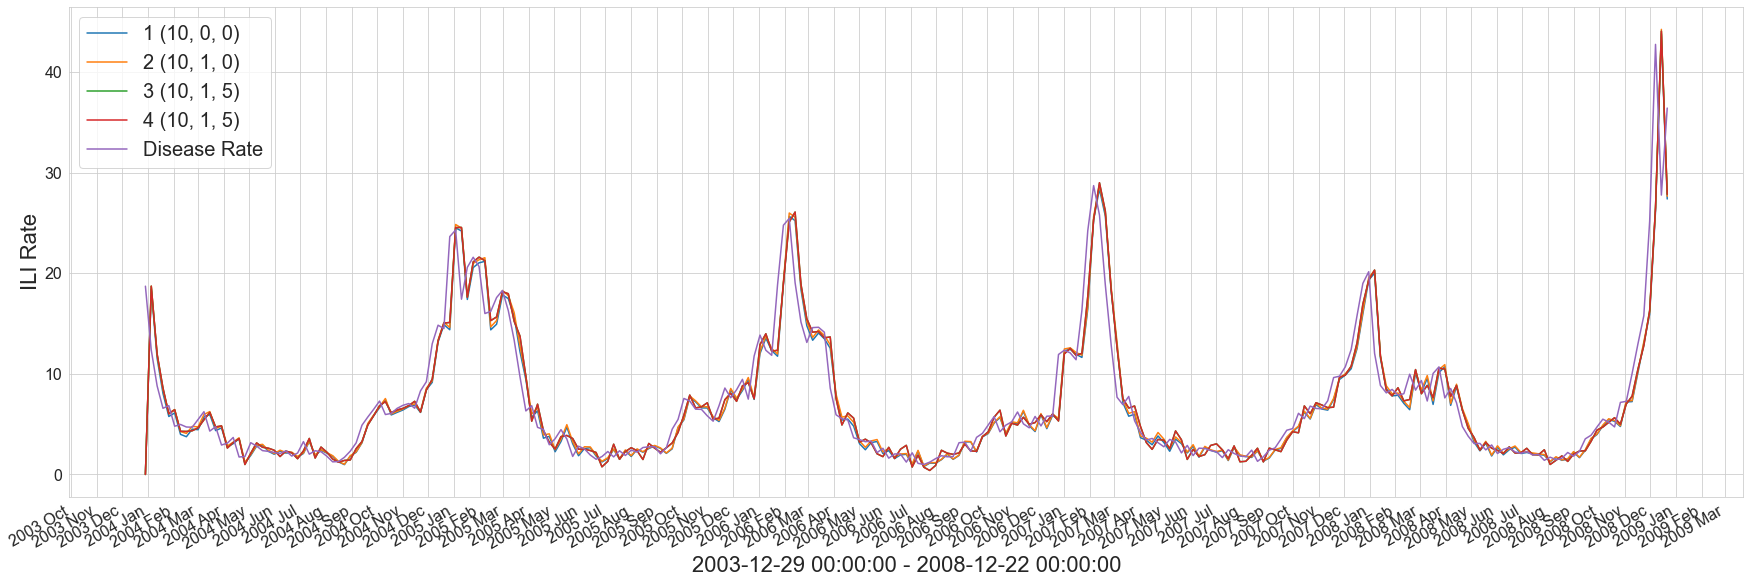

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate,"1 (10, 0, 0)","2 (10, 1, 0)","3 (10, 1, 5)","4 (10, 1, 5)"
week range,,,,,,,,,,,,,,,,,,,,,
2003-12-29/2004-01-04,2004,1,115.857389,0.000000,0.000000,0.000000,0.0,0.000000,0.0,114.994878,...,0.0,0.0,0.000000,0.0,0.0,18.716703,0.000000,0.000000,0.000000,0.000000
2004-01-05/2004-01-11,2004,2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,12.366981,18.387788,18.716713,18.716711,18.716711
2004-01-12/2004-01-18,2004,3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,8.808089,11.553327,11.890378,11.981067,11.981067
2004-01-19/2004-01-25,2004,4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,104.092730,...,0.0,0.0,0.000000,0.0,0.0,6.575904,8.060622,8.436619,8.608239,8.608239
2004-01-26/2004-02-01,2004,5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,6.837619,5.760483,6.086924,6.015826,6.015826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-11-24/2008-11-30,2008,48,24.650378,0.000000,9.447065,22.170672,0.0,0.000000,0.0,65.707069,...,0.0,0.0,0.000000,0.0,0.0,15.774984,13.036807,13.179650,12.796252,12.796252
2008-12-01/2008-12-07,2008,49,52.356763,10.222409,19.084723,23.240296,0.0,0.000000,0.0,48.687510,...,0.0,0.0,36.525696,0.0,0.0,25.178583,15.921398,16.120866,16.311309,16.311309
2008-12-08/2008-12-14,2008,50,37.407111,10.566240,10.024806,46.308162,0.0,13.948752,0.0,88.726676,...,0.0,0.0,0.000000,0.0,0.0,42.756633,26.180615,26.482741,26.537637,26.537637


In [15]:
plot_ar_results('train', arHelperList)

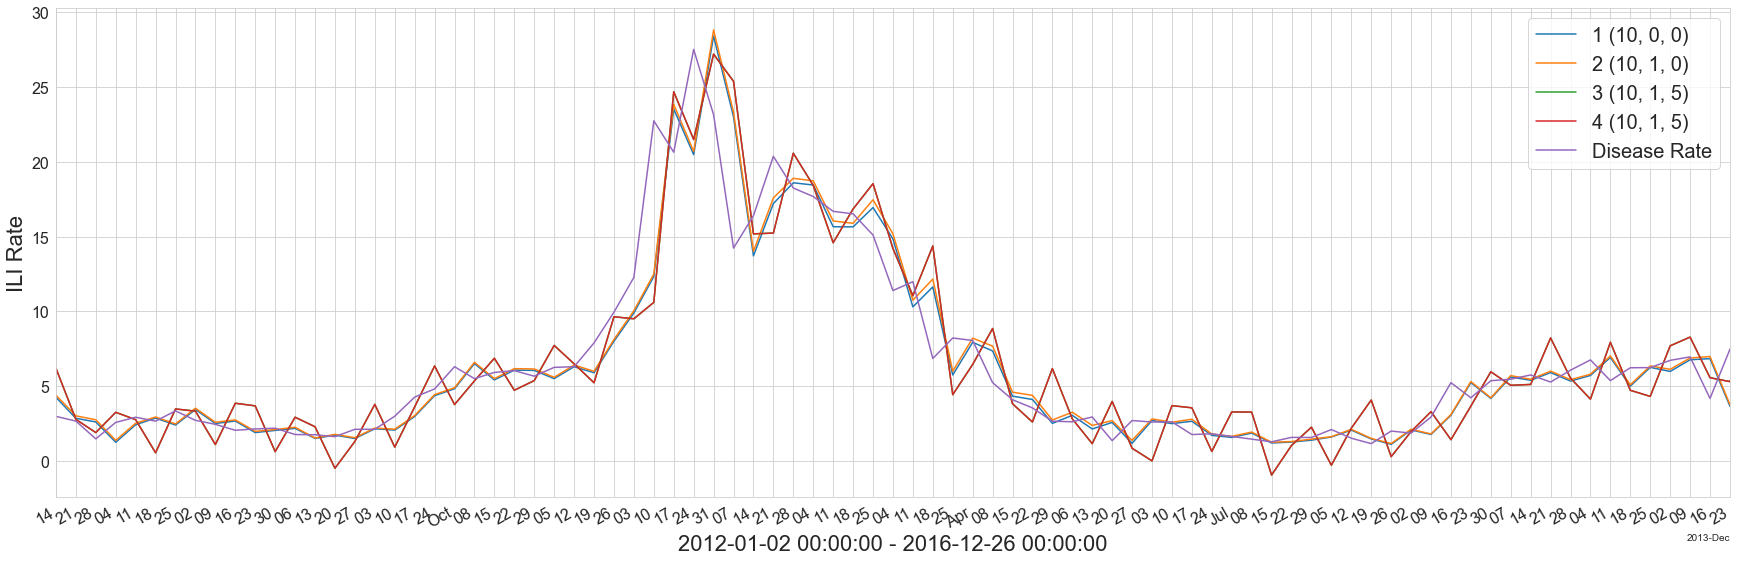

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate,"1 (10, 0, 0)","2 (10, 1, 0)","3 (10, 1, 5)","4 (10, 1, 5)"
week range,,,,,,,,,,,,,,,,,,,,,
2012-01-02/2012-01-08,2012,1,75.158350,12.260834,0.000000,33.213497,10.662296,10.046814,15.160331,103.876933,...,0.0,0.000000,23.087480,0.000000,0.000000,8.208383,8.377781,8.564647,9.963070,9.963070
2012-01-09/2012-01-15,2012,2,89.008437,9.858807,12.849231,55.167526,11.811597,23.291844,12.256224,91.294055,...,0.0,0.000000,0.000000,0.000000,0.000000,6.233959,8.323813,8.471770,8.015602,8.015602
2012-01-16/2012-01-22,2012,3,102.628042,10.460135,17.880642,64.224352,4.965759,16.736362,20.251807,66.762956,...,0.0,0.000000,0.000000,0.000000,0.000000,7.312059,5.519807,5.692858,3.250894,3.250894
2012-01-23/2012-01-29,2012,4,94.948504,0.000000,21.522218,71.289169,18.242915,43.689360,11.211431,120.910813,...,0.0,0.000000,0.000000,0.000000,0.000000,8.613503,7.626499,7.787551,8.770651,8.770651
2012-01-30/2012-02-05,2012,5,198.214661,36.720894,12.943785,116.197070,34.890790,73.332179,21.686361,182.319614,...,0.0,0.000000,0.000000,0.000000,0.000000,10.171725,8.124257,8.337644,10.151014,10.151014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-28/2016-12-04,2016,48,150.272484,17.927911,18.882017,61.773325,13.836409,26.907264,22.351080,195.410711,...,0.0,5.293103,39.253223,0.000000,5.817636,9.840249,7.929622,8.048303,8.370791,8.370791
2016-12-05/2016-12-11,2016,49,116.113901,22.717740,21.972153,73.961038,14.297525,25.492983,19.723531,188.042306,...,0.0,0.000000,22.670892,0.000000,0.000000,12.860661,9.856776,10.026073,10.418251,10.418251
2016-12-12/2016-12-18,2016,50,143.863750,20.324438,34.410511,64.914144,18.401006,17.506422,11.736882,179.212924,...,0.0,6.374509,36.954381,5.727608,0.000000,15.255800,12.753858,12.936423,11.548413,11.548413


In [16]:
full_test_df = plot_ar_results('test', arHelperList,
                               xlim=[to_week_range(2012, 20),to_week_range(2013, 52)], x_format='week')
full_test_df

In [17]:
# y = full_test_df['Disease Rate']
# coef = train_result.params
# res = 0
# t = 10
# for i in range(0, 5):
#     res += coef[i] * y[t - i - 1]
#     print('coef * y = ' + str(coef[i]) + ' * ' + str(y[t - i - 1])
#           + ' = ' + str(coef[5 - i] * y[t - i - 1]))
# print(str(res))
# print(y[t])

In [18]:
from data.errors import Errors

predicted_col_names = []
for i in range(0, len(ORDERS)):
    predicted_col_names.append(str(i + 1) + ' ' + arHelperList[i].model_name)

get_errors_for_models(full_test_df, error_type='mae', actual_col_name='Disease Rate',
                      predicted_col_names=predicted_col_names)

,years,no. of weeks,"1 (10, 0, 0)","2 (10, 1, 0)","3 (10, 1, 5)","4 (10, 1, 5)"
0,2012,52,1.244948,1.252502,1.812310,1.812310
1,2013,52,1.300759,1.322548,2.068621,2.068621
2,2014,52,1.253401,1.251307,1.638465,1.638465
3,2015,53,1.171155,1.194374,1.640401,1.640401
4,2016,52,1.528857,1.514115,1.763933,1.763933


In [19]:
get_errors_for_models(full_test_df, error_type='mape', actual_col_name='Disease Rate',
                      predicted_col_names=predicted_col_names)

,years,no. of weeks,"1 (10, 0, 0)","2 (10, 1, 0)","3 (10, 1, 5)","4 (10, 1, 5)"
0,2012,52,18.382807,18.752066,34.270008,34.270008
1,2013,52,22.607981,23.080152,51.165367,51.165367
2,2014,52,23.448757,23.677555,35.895216,35.895216
3,2015,53,20.273444,20.841181,32.606423,32.606423
4,2016,52,24.774044,24.699390,32.837720,32.837720


In [20]:
get_errors_for_models(full_test_df, error_type='mse', actual_col_name='Disease Rate',
                      predicted_col_names=predicted_col_names)

,years,no. of weeks,"1 (10, 0, 0)","2 (10, 1, 0)","3 (10, 1, 5)","4 (10, 1, 5)"
0,2012,52,4.471034,4.384295,7.029331,7.029331
1,2013,52,4.237129,4.520466,7.849563,7.849563
2,2014,52,4.136819,4.067322,5.781404,5.781404
3,2015,53,2.802193,2.942048,5.075412,5.075412
4,2016,52,4.052642,4.138599,5.273993,5.273993


In [21]:
get_errors_for_models(full_test_df, error_type='rmse', actual_col_name='Disease Rate',
                      predicted_col_names=predicted_col_names)

,years,no. of weeks,"1 (10, 0, 0)","2 (10, 1, 0)","3 (10, 1, 5)","4 (10, 1, 5)"
0,2012,52,2.114482,2.093871,2.651289,2.651289
1,2013,52,2.058429,2.126139,2.801707,2.801707
2,2014,52,2.033917,2.016760,2.404455,2.404455
3,2015,53,1.673975,1.715240,2.252868,2.252868
4,2016,52,2.013118,2.034355,2.296518,2.296518
